<a href="https://colab.research.google.com/github/GnomeRapiere/Machine-Deep-Learning-Project/blob/main/Projet_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairies de travail :

In [ ]:
%matplotlib inline
%tensorflow_version 2.x
import sys

#maths et graphes
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#traitement datas
import pandas as pd

#deep learning
import tensorflow as tf
from tensorflow import keras  

#xgboost
import xgboost

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Chargement du dataset MNIST

Keras permet de charger de nombreux datasets avec keras.datasets. Nous utiliserons le jeu de données MNIST Modifier ou Mixed National Institute of Standards and Technology, qui est une base de données de chiffres manuscrits.

La base MNIST est devenu un test standard. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1. Ces images sont en noir et blanc, normalisées centrées et de 28 pixels de côté.


In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

#Séparation des données en jeu de validation (5000 images) et jeu d'entrainement (55000 images)

X_affichage=X_test
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Comparaison des différents algo 


In [ ]:
# Initialisation du dataframe qui contiendra le score de chacun des modèles
# Ce dataframe nous permettra de faire un graphique pour comparer le score de chacun des modeles

scores_modeles = pd.DataFrame(columns=['model_name', 'score'])

# Création d'un KNN pour notre dataset :



Adaptation des données à une matrice 2D pour l'utilisation du KNN de sci-kitlearn.

In [ ]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

#sans cette adaptation, le format initial de la matrice ne conviendrait pas et nous empêcherait d'utiliser notre knn.

1) Apprentissage

In [ ]:
print(X_train[0])
knn = KNeighborsClassifier(7)
modele = knn.fit(X_train, y_train)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  97  96  77 118  61   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  90 138 235 235 235 235 235
 235 251 251 248 254 245 235 190  21   0   0   0   

2) Predictions

In [ ]:
predictions = modele.predict(X_test)

3) Test du Knn sur quelques échantillons :

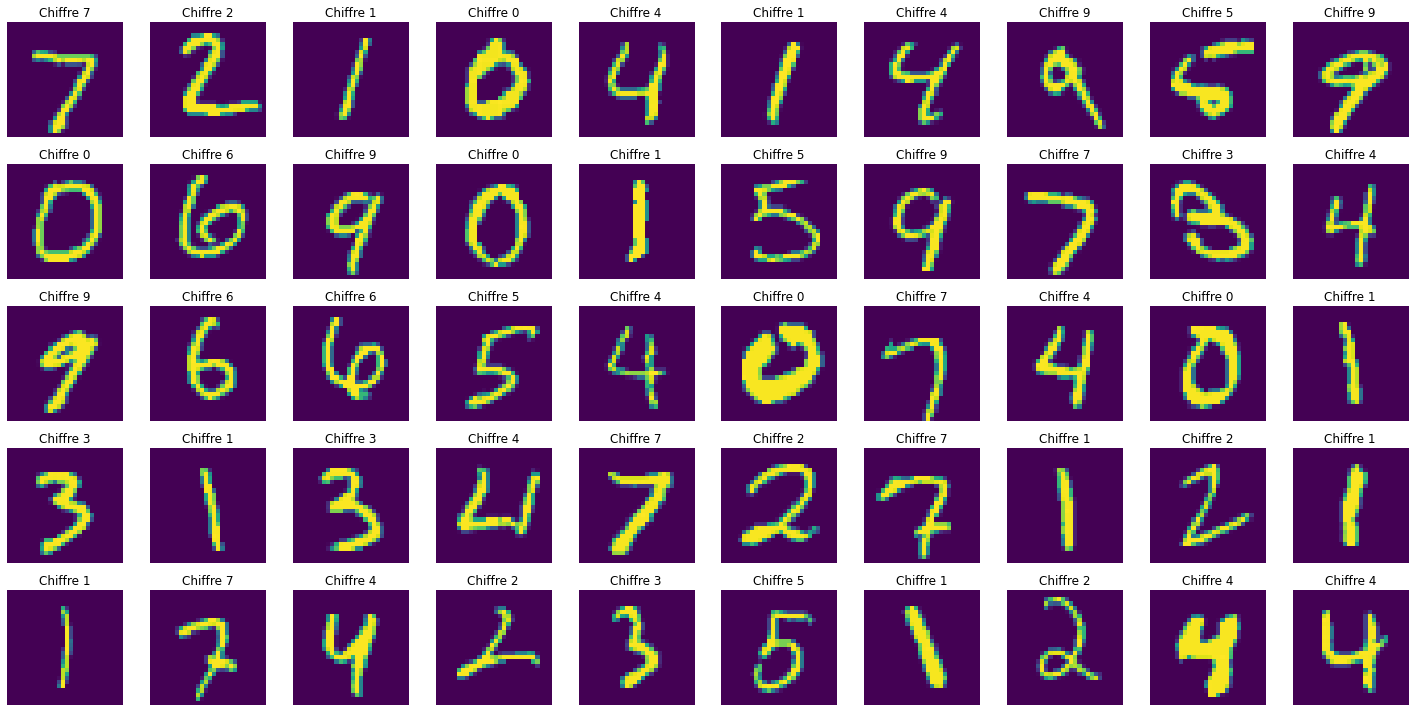

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*2, n_rows*2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_affichage[index])
        plt.axis('off')
        plt.title('Chiffre ' + str(predictions[index]))
plt.tight_layout()
plt.show()

Score

In [ ]:
score = modele.score(X_test,y_test)
score

0.9679

In [ ]:
# On mémorise le résultat pour créer un graphique de synthèse
scoreDF = pd.DataFrame({'model_name': ['knn'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles.head(10)

,model_name,score
0,knn,0.9679


# Création d'un XGBOOST

Mise en forme du dataset:

In [ ]:
xgtrain = xgboost.DMatrix(X_train, label=y_train)
xgtest = xgboost.DMatrix(X_test, label=y_test)

Paramétrage du xgboost:

In [ ]:
param = {
    'max_depth': 5,                 # the maximum depth of each tree
    'eta': 0.3,                     # the training step for each iteration
    'silent': 1,                    # logging mode - quiet
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10                 # the number of classes that exist in this datset
}  
num_round = 10 # the number of training iterations


Création du modèle et prédictions :

In [ ]:
model2 = xgboost.train(param, xgtrain, num_round)

In [ ]:
preds = model2.predict(xgtest) #prédictions pour ce modèle

Score

In [ ]:
acc = metrics.accuracy_score(y_test, preds)
print('Accuracy: %f' % acc)

#Moins précis que le KNN !

Accuracy: 0.929600


In [ ]:
# On mémorise le résultat pour créer un graphique de synthèse
scoreDF = pd.DataFrame({'model_name': ['XgBoost'],'score': [acc]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles.head(10)

,model_name,score
0,knn,0.9679
1,XgBoost,0.9296


# Creation d'un Random Forest

Apprentissage

In [ ]:
random_forest = RandomForestClassifier(n_estimators=500)
modele = random_forest.fit(X_train, y_train)

Prédiction

In [ ]:
predictions = modele.predict(X_test)

Score

In [ ]:
score = modele.score(X_test,y_test)
score

0.9714

In [ ]:
# On mémorise le résultat pour créer un graphique de synthèse
scoreDF = pd.DataFrame({'model_name': ['RandomForest'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,knn,0.9679
1,XgBoost,0.9296
2,RandomForest,0.9714


# Scores des algos de machine learning classique


[Text(0, 0.5, '%'), Text(0.5, 0, 'Modèle')]

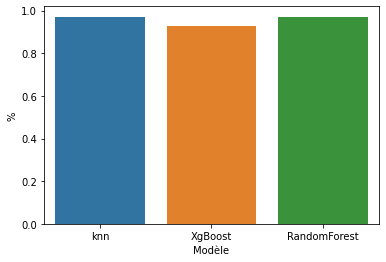

In [ ]:
import seaborn as sns

ax = sns.barplot(x='model_name',y='score',data=scores_modeles)
ax.set(xlabel='Modèle', ylabel='%')


# Création d'un modèle de Deep Learning

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

#Séparation des données en jeu de validation (5000 images) et jeu d'entrainement (55000 images)

X_affichage=X_test
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

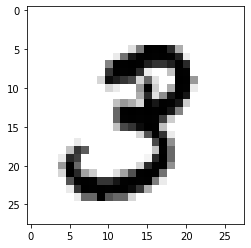

In [ ]:
plt.imshow(X_train[1], cmap="binary")
plt.show()

Pré-Processing:

Les images étant dans l'échelle grayscale, les valeurs varient de 0 à 255.

Afin de normaliser (centrer) les données, nous allons implémenter la fonction Min-Max scaling dans la fonction `normalize_grayscale()`. Après la mise à l'échelle, les valeurs des pixels des données d'entrée iront de 0.1 à 0.9.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$


In [ ]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    xmin=image_data.min()
    xmax=image_data.max()
    return (a+((image_data-xmin)*(b-a))/(xmax-xmin))


### VERIFICATION DE L'IMPLEMENTATION AVEC LES TESTS UNITAIRES CI-DESSOUS ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])


train_features = normalize_grayscale(X_train)
val_features = normalize_grayscale(X_valid)
test_features = normalize_grayscale(X_test)


Modèle :

In [ ]:
#Ci-dessous la création de notre premier modèle de deep learning en utilisant l'API keras de Tensorflow.
#On crée un modèle séquentiel constitué de 3 couches, 2 couches denses et une couche Flatten.
modelDL = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

In [ ]:
modelDL.summary() #recap de notre modèles (avec infos sur chacune des couches)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                39250     
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelDL.compile(optimizer=keras.optimizers.SGD(lr=0.01),loss="sparse_categorical_crossentropy",metrics="accuracy")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=modelDL.fit(train_features,y_train,epochs=3,validation_data=(val_features, y_valid)) 
#entrainement du modèle sur 4 epochs (celle-ci servent à séparer l'entrainement en plusieurs phases distinctes)

Epoch 1/3
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8295 - accuracy: 0.7908 - val_loss: 0.4286 - val_accuracy: 0.8898
Epoch 2/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8904 - val_loss: 0.3371 - val_accuracy: 0.9062
Epoch 3/3
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3421 - accuracy: 0.9038 - val_loss: 0.3048 - val_accuracy: 0.9178


In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

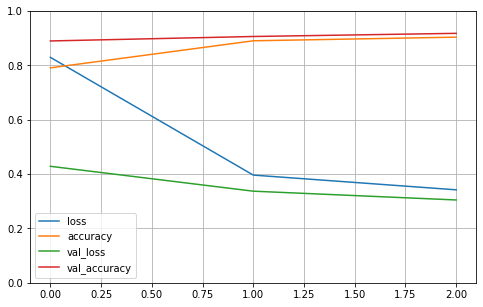

In [ ]:
plot_learning_curves(history) 

Prédictions:

In [ ]:
y_proba = modelDL.predict(test_features)
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.01, 0.  , 0.85, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.96, 0.01, ..., 0.  , 0.01, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.04],
       [0.01, 0.  , 0.  , ..., 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Visualisation:

In [ ]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Chiffre prédit {} {:2.0f}% ({})".format(predicted_label,
                                                        np.max(predictions_array) *100,
                                                        true_label),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

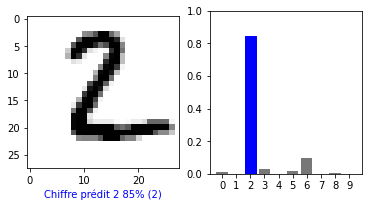

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

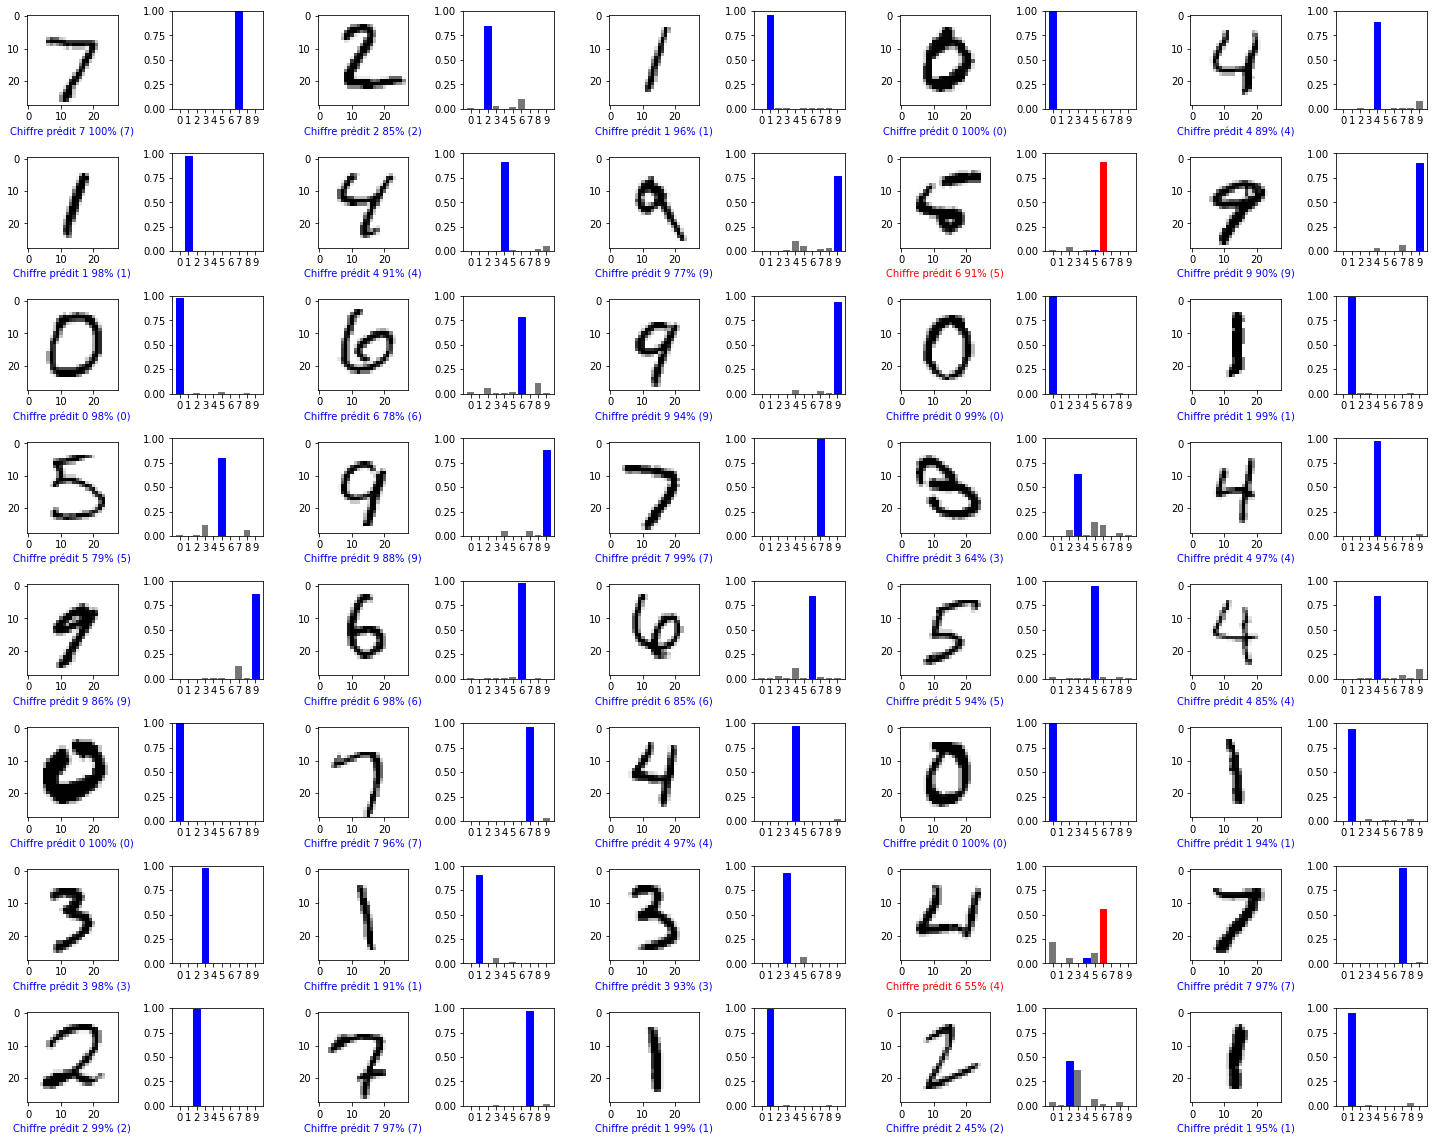

In [ ]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])
plt.tight_layout()
plt.show()

Images mal prédites :

In [ ]:
y_proba_false = y_proba[y_pred != y_test]
y_test_false = y_test[y_pred != y_test]
X_test_false = X_test[y_pred != y_test]

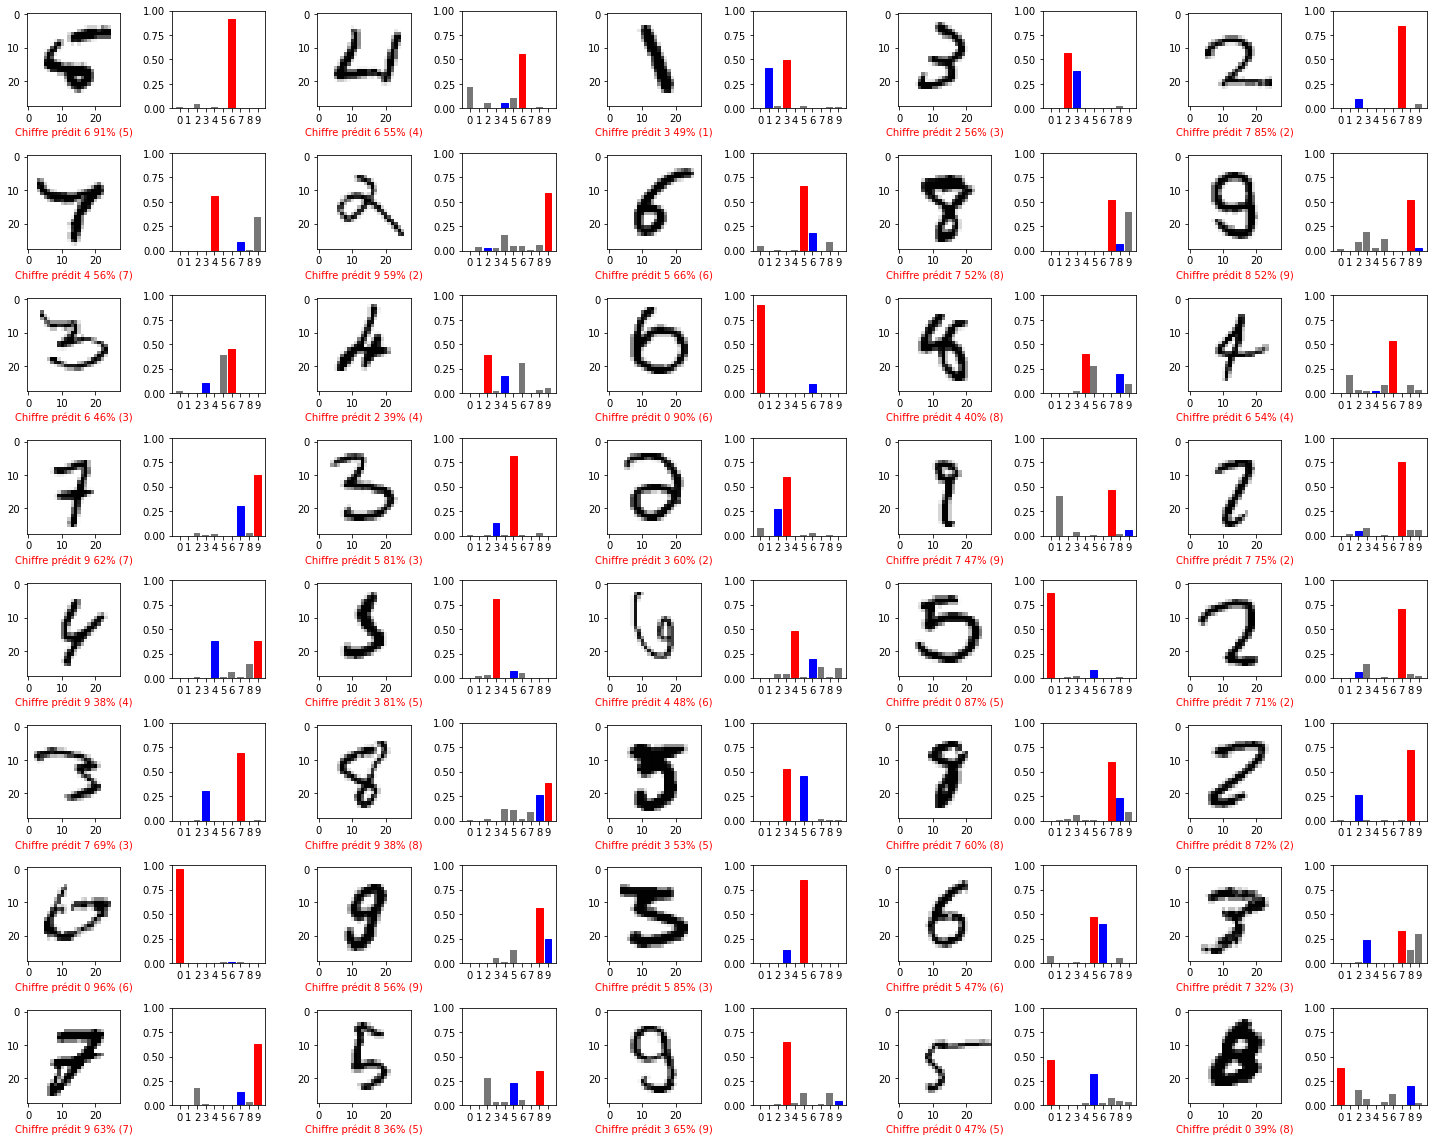

In [ ]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba_false[index], y_test_false[index], X_test_false[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba_false[index], y_test_false[index], X_test_false[index])
plt.tight_layout()
plt.show()

Précision du modèle :

In [ ]:
loss, score= modelDL.evaluate(test_features,y_test)
score
scoreDL = pd.DataFrame({'model_name': ['Réseau de neuronnes denses'],'score': [score]})
scores_modeles=scores_modeles.append(scoreDL,ignore_index=True)
scores_modeles

313/313 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.9127


,model_name,score
0,knn,0.9679
1,XgBoost,0.9296
2,RandomForest,0.9714
3,Réseau de neuronnes denses,0.9127


# Convolution Neural Network (CNN)

In [ ]:
#Mise en place d'un modèle CNN dont la forme est générale : alternance de couche conv2D et de MaxPool.
modelCNN = keras.models.Sequential([ 
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2), #la couche dropout est optionnelle ici permet d'éviter l'overfitting
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax') 
])

modelCNN.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),loss="sparse_categorical_crossentropy",metrics="accuracy")

historyCNN = modelCNN.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid)) #entrainement du modèle

Epoch 1/2
1719/1719 [==============================] - 235s 136ms/step - loss: 0.4926 - accuracy: 0.8435 - val_loss: 0.0797 - val_accuracy: 0.9786
Epoch 2/2
1719/1719 [==============================] - 243s 142ms/step - loss: 0.1035 - accuracy: 0.9673 - val_loss: 0.0497 - val_accuracy: 0.9854


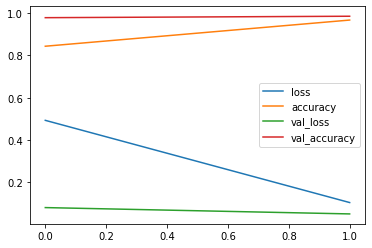

In [ ]:
pd.DataFrame(historyCNN.history).plot()
#plt.axis([0, 19, 0, 2])
plt.show()

In [ ]:
modelCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

Prédiction :

In [ ]:
y_proba = modelCNN.predict(X_test)
y_proba[:10].round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ,
        0.001],
       [0.   , 0.001, 0.002, 0.   , 0.045, 0.   , 0.   , 0.   , 0.   ,
        0.952],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.998, 0.001, 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999]], dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Visualisation :

In [ ]:
classes=["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Objet prédit {} {:2.0f}% ({})".format(classes[predicted_label],
                                                        np.max(predictions_array) *100,
                                                        classes[true_label]),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(classes, predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.xticks(classes, rotation=90)

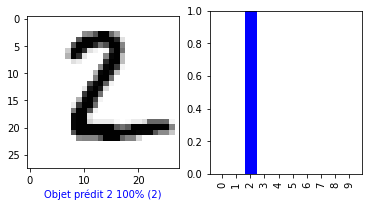

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

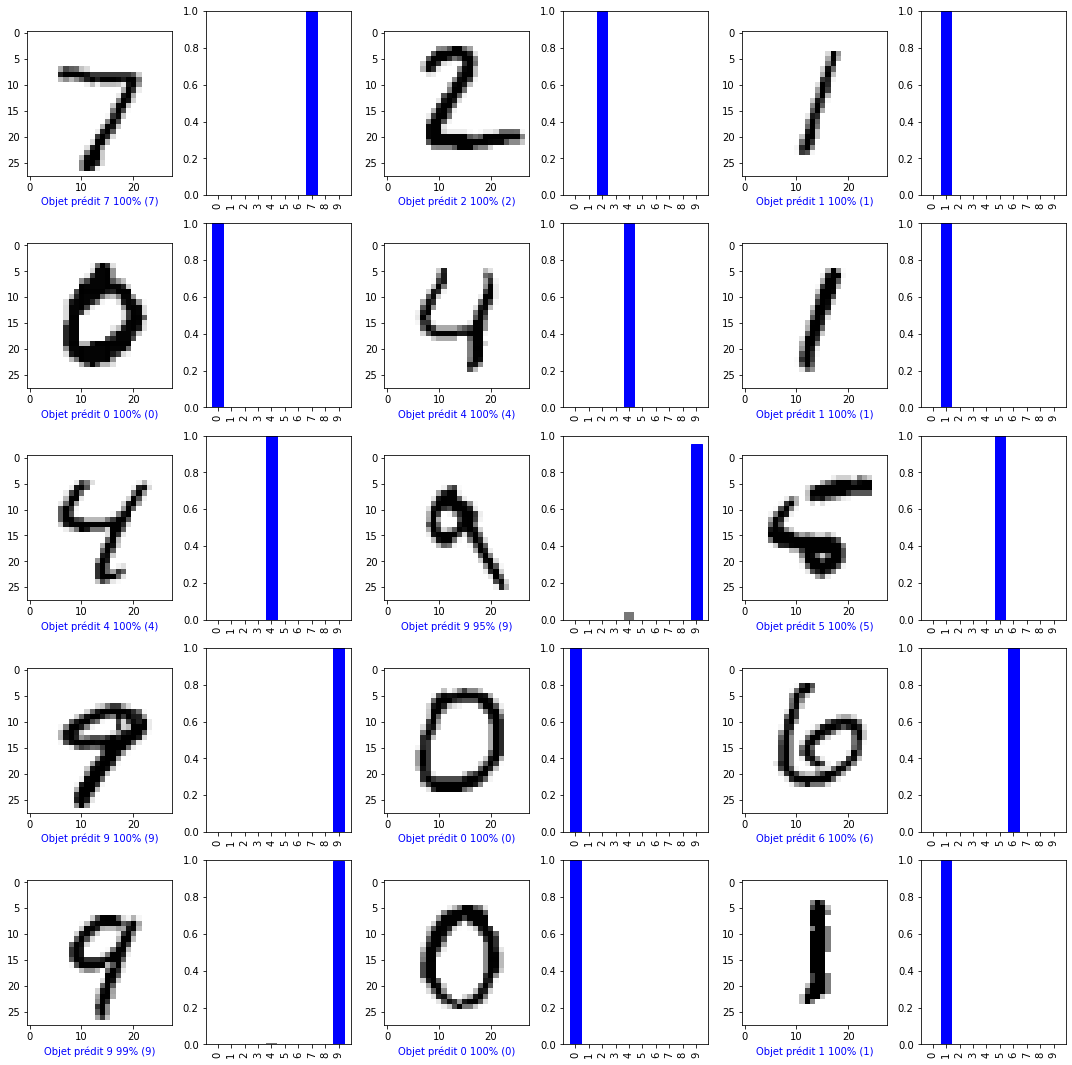

In [ ]:
num_rows = 5
num_cols = 3
plt.figure(figsize=(5*num_cols, 3*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])
plt.tight_layout()
plt.show()


Précision du modèle :

In [ ]:
loss, score= modelCNN.evaluate(X_test,y_test)
score
scoreCNN = pd.DataFrame({'model_name': ['CNN'],'score': [score]})
scores_modeles=scores_modeles.append(scoreCNN,ignore_index=True)
scores_modeles

313/313 [==============================] - 11s 35ms/step - loss: 0.0476 - accuracy: 0.9847


,model_name,score
0,knn,0.9679
1,XgBoost,0.9296
2,RandomForest,0.9714
3,Réseau de neuronnes denses,0.9127
4,CNN,0.9847


# Transformers

Contrairement au précédents algos, le Transformers a un gros défaut, son temps d'exécution, en effet on a fait de très nombreux tests et la durée variait de 40 minutes à environ 1h10. On a essayé de jouer sur le batch-size ou d'autres paramètres mais cela a eu une influence assez faible sur le temps d'éxecution. Pour ce qui est du choix du nombre d'epoch effectué, je vous laisse lire le commentaire ci-dessous qui détaille pourquoi on a fait ce choix.

In [ ]:
#Installation des modules pytorch nécessaire à l'implémentation de ce tranformers
!pip install pytorch
!pip install vit_pytorch
import torch
import torchvision
from vit_pytorch import ViT
import time
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(97)

#on récupère ici le mnist venant de pytorch.
Dpath = '/data/mnist'
Bs_Train = 100
Bs_Test = 500 #choix du batch size

tform_mnist = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                  torchvision.transforms.Normalize((0.1307,),(0.3081,))])

#Download et mise en place des datasets

tr_set = torchvision.datasets.MNIST(Dpath, train = True, download = True,
                                       transform = tform_mnist)

tr_load = torch.utils.data.DataLoader(tr_set, batch_size = Bs_Train, shuffle = True)

ts_set = torchvision.datasets.MNIST(Dpath, train = False, download = True, transform = tform_mnist)

ts_load = torch.utils.data.DataLoader(ts_set, batch_size = Bs_Test, shuffle = True)

#fonction pour entrainer notre dataset

def train_iter(model, optimz, data_load, loss_val):
    samples = len(data_load.dataset)
    model.train()
    
    for i, (data, target) in enumerate(data_load):
        optimz.zero_grad()
        out = F.log_softmax(model(data), dim=1)
        loss = F.nll_loss(out, target)
        loss.backward()
        optimz.step()
        
        if i % 100 == 0:
            print('[' +  '{:5}'.format(i * len(data)) + '/' + '{:5}'.format(samples) +
                  ' (' + '{:3.0f}'.format(100 * i / len(data_load)) + '%)]  Loss: ' +
                  '{:6.4f}'.format(loss.item()))
            loss_val.append(loss.item())

#fonction équivalente aux .evaluate qu'on a utilisé sur keras
#elle va notamment nous retourner la précision du modèle
#on en aura besoin pour l'ajouter à notre tableau comparatif des précisions de nos différents algorithmes de prédictions.

def evaluate(model, data_load, loss_val):
    model.eval()
    
    samples = len(data_load.dataset)
    csamp = 0
    tloss = 0

    with torch.no_grad():
        for data, target in data_load:
            output = F.log_softmax(model(data), dim=1)
            loss = F.nll_loss(output, target, reduction='sum')
            _, pred = torch.max(output, dim=1)
            
            tloss += loss.item()
            csamp += pred.eq(target).sum()

    aloss = tloss / samples
    loss_val.append(aloss)
    print('\nAverage test loss: ' + '{:.4f}'.format(aloss) +
          '  Accuracy:' + '{:5}'.format(csamp) + '/' +
          '{:5}'.format(samples) + ' (' +
          '{:4.2f}'.format(100.0 * csamp / samples) + '%)\n')
    accuracy = csamp / samples
    return accuracy
    
N_EPOCHS = 3
#après plusieurs tests le meilleur compromis pour le nb d'epochs semble être 3 car pour les 3 premières epochs, on gagne à chaque fois 
#un peu plus de 1% de précisions alors que de l'epoch 3 à 4 on passe de 96,72 à 96,93 puis de 96,93 à 96,99 pour l'epoch 4 à 5
#l'augmentation de précision devient donc négligeable en comparaison du temps d'execution nécessaire (3464 secondes pour 5 epochs avec un batchsize égal à 1000)

start_time = time.time()
model = ViT(image_size=28, patch_size=4, num_classes=10, channels=1,
            dim=64, depth=6, heads=8, mlp_dim=128)
optimz = optim.Adam(model.parameters(), lr=0.003)

trloss_val, tsloss_val = [], []
for epoch in range(1, N_EPOCHS + 1):
    print('Epoch:', epoch)
    train_iter(model, optimz, tr_load, trloss_val)
    acc = evaluate(model, ts_load, tsloss_val)

print('Execution time:', '{:5.2f}'.format(time.time() - start_time), 'seconds')

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-pg3fsg6t/pytorch_429db5fe453b45d8924004e0425ffb02/setup.py'"'"'; __file__='"'"'/tmp/pip-install-pg3fsg6t/pytorch_429db5fe453b45d8924004e0425ffb02/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-el0cim0l/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.
Epoch: 1
[    0/60000 (  0%

Précision du modèle

In [ ]:
score = float(evaluate(model, ts_load, tsloss_val)) #on récupère la précision de l'algo.

scoreTF = pd.DataFrame({'model_name': ['Transformers'],'score': [score]})
scores_modeles=scores_modeles.append(scoreTF,ignore_index=True)
scores_modeles


Average test loss: 0.1170  Accuracy: 9631/10000 (96.31%)



,model_name,score
0,knn,0.9679
1,XgBoost,0.9296
2,RandomForest,0.9714
3,Réseau de neuronnes denses,0.9127
4,CNN,0.9847
5,Transformers,0.9631


Le CNN semble donc se dégager comme grand vainqueur parmis tous les algos qu'on a utilisé !

# Comparaison finale des précisions de tous les algorithmes étudiés

[Text(0, 0.5, '%'), Text(0.5, 0, 'Modèle')]

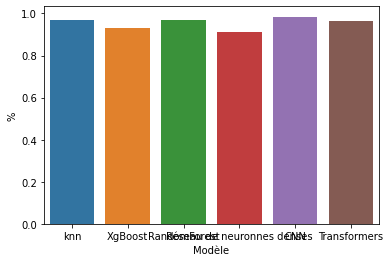

In [ ]:
ax = sns.barplot(x='model_name',y='score',data=scores_modeles)
ax.set(xlabel='Modèle', ylabel='%')

# Perceiver (ne fonctionne pas en l'état)

In [ ]:
!pip install -U tensorflow-addons
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 10
input_shape = (28, 28)


print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

print(X_train[0].shape)

# num_classes = 100
# input_shape = (32, 32, 3)

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
# print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (55000, 28, 28) - y_train shape: (55000,)
x_test shape: (10000, 28, 28) - y_test shape: (10000,)
(28, 28)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 64
num_epochs = 50
dropout_rate = 0.2
image_size = 64  # We'll resize input images to this size.
patch_size = 1  # Size of the patches to be extract from the input images.
num_patches = (image_size // patch_size) ** 2  # Size of the data array.
latent_dim = 256  # Size of the latent array.
projection_dim = 256  # Embedding size of each element in the data and latent arrays.
num_heads = 8  # Number of Transformer heads.
ffn_units = [
    projection_dim,
    projection_dim,
]  # Size of the Transformer Feedforward network.
num_transformer_blocks = 4
num_iterations = 2  # Repetitions of the cross-attention and Transformer modules.
classifier_units = [
    projection_dim,
    num_classes,
]  # Size of the Feedforward network of the final classifier.

print(f"Image size: {image_size} X {image_size} = {image_size ** 2}")
print(f"Patch size: {patch_size} X {patch_size} = {patch_size ** 2} ")
print(f"Patches per image: {num_patches}")
print(f"Elements per patch (3 channels): {(patch_size ** 2) * 3}")
print(f"Latent array shape: {latent_dim} X {projection_dim}")
print(f"Data array shape: {num_patches} X {projection_dim}")

Image size: 64 X 64 = 4096
Patch size: 1 X 1 = 1 
Patches per image: 4096
Elements per patch (3 channels): 3
Latent array shape: 256 X 256
Data array shape: 4096 X 256


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)

In [ ]:
def create_ffn(hidden_units, dropout_rate):
    ffn_layers = []
    for units in hidden_units[:-1]:
        ffn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    ffn_layers.append(layers.Dense(units=hidden_units[-1]))
    ffn_layers.append(layers.Dropout(dropout_rate))

    ffn = keras.Sequential(ffn_layers)
    return ffn

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patches) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_cross_attention_module(
    latent_dim, data_dim, projection_dim, ffn_units, dropout_rate
):

    inputs = {
        # Recieve the latent array as an input of shape [1, latent_dim, projection_dim].
        "latent_array": layers.Input(shape=(latent_dim, projection_dim)),
        # Recieve the data_array (encoded image) as an input of shape [batch_size, data_dim, projection_dim].
        "data_array": layers.Input(shape=(data_dim, projection_dim)),
    }

    # Apply layer norm to the inputs
    latent_array = layers.LayerNormalization(epsilon=1e-6)(inputs["latent_array"])
    data_array = layers.LayerNormalization(epsilon=1e-6)(inputs["data_array"])

    # Create query tensor: [1, latent_dim, projection_dim].
    query = layers.Dense(units=projection_dim)(latent_array)
    # Create key tensor: [batch_size, data_dim, projection_dim].
    key = layers.Dense(units=projection_dim)(data_array)
    # Create value tensor: [batch_size, data_dim, projection_dim].
    value = layers.Dense(units=projection_dim)(data_array)

    # Generate cross-attention outputs: [batch_size, latent_dim, projection_dim].
    attention_output = layers.Attention(use_scale=True, dropout=0.1)(
        [query, key, value], return_attention_scores=False
    )
    # Skip connection 1.
    attention_output = layers.Add()([attention_output, latent_array])

    # Apply layer norm.
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output)
    # Apply Feedforward network.
    ffn = create_ffn(hidden_units=ffn_units, dropout_rate=dropout_rate)
    outputs = ffn(attention_output)
    # Skip connection 2.
    outputs = layers.Add()([outputs, attention_output])

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
def create_transformer_module(
    latent_dim,
    projection_dim,
    num_heads,
    num_transformer_blocks,
    ffn_units,
    dropout_rate,
):

    # input_shape: [1, latent_dim, projection_dim]
    inputs = layers.Input(shape=(latent_dim, projection_dim))

    x0 = inputs
    # Create multiple layers of the Transformer block.
    for _ in range(num_transformer_blocks):
        # Apply layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(x0)
        # Create a multi-head self-attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, x0])
        # Apply layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # Apply Feedforward network.
        ffn = create_ffn(hidden_units=ffn_units, dropout_rate=dropout_rate)
        x3 = ffn(x3)
        # Skip connection 2.
        x0 = layers.Add()([x3, x2])

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=x0)
    return model

In [ ]:
class Perceiver(keras.Model):
    def __init__(
        self,
        patch_size,
        data_dim,
        latent_dim,
        projection_dim,
        num_heads,
        num_transformer_blocks,
        ffn_units,
        dropout_rate,
        num_iterations,
        classifier_units,
    ):
        super(Perceiver, self).__init__()

        self.latent_dim = latent_dim
        self.data_dim = data_dim
        self.patch_size = patch_size
        self.projection_dim = projection_dim
        self.num_heads = num_heads
        self.num_transformer_blocks = num_transformer_blocks
        self.ffn_units = ffn_units
        self.dropout_rate = dropout_rate
        self.num_iterations = num_iterations
        self.classifier_units = classifier_units

    def build(self, input_shape):
        # Create latent array.
        self.latent_array = self.add_weight(
            shape=(self.latent_dim, self.projection_dim),
            initializer="random_normal",
            trainable=True,
        )

        # Create patching module.
        self.patcher = Patches(self.patch_size)

        # Create patch encoder.
        self.patch_encoder = PatchEncoder(self.data_dim, self.projection_dim)

        # Create cross-attenion module.
        self.cross_attention = create_cross_attention_module(
            self.latent_dim,
            self.data_dim,
            self.projection_dim,
            self.ffn_units,
            self.dropout_rate,
        )

        # Create Transformer module.
        self.transformer = create_transformer_module(
            self.latent_dim,
            self.projection_dim,
            self.num_heads,
            self.num_transformer_blocks,
            self.ffn_units,
            self.dropout_rate,
        )

        # Create global average pooling layer.
        self.global_average_pooling = layers.GlobalAveragePooling1D()

        # Create a classification head.
        self.classification_head = create_ffn(
            hidden_units=self.classifier_units, dropout_rate=self.dropout_rate
        )

        super(Perceiver, self).build(input_shape)

    def call(self, inputs):
        # Augment data.
        augmented = data_augmentation(inputs)
        # Create patches.
        patches = self.patcher(augmented)
        # Encode patches.
        encoded_patches = self.patch_encoder(patches)
        # Prepare cross-attention inputs.
        cross_attention_inputs = {
            "latent_array": tf.expand_dims(self.latent_array, 0),
            "data_array": encoded_patches,
        }
        # Apply the cross-attention and the Transformer modules iteratively.
        for _ in range(self.num_iterations):
            # Apply cross-attention from the latent array to the data array.
            latent_array = self.cross_attention(cross_attention_inputs)
            # Apply self-attention Transformer to the latent array.
            latent_array = self.transformer(latent_array)
            # Set the latent array of the next iteration.
            cross_attention_inputs["latent_array"] = latent_array

        # Apply global average pooling to generate a [batch_size, projection_dim] repesentation tensor.
        representation = self.global_average_pooling(latent_array)
        # Generate logits.
        logits = self.classification_head(representation)
        return logits

In [ ]:
def run_experiment(model):

    # Create LAMB optimizer with weight decay.
    optimizer = tfa.optimizers.LAMB(
        learning_rate=learning_rate, weight_decay_rate=weight_decay,
    )

    # Compile the model.
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="acc"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top5-acc"),
        ],
    )

    # Create a learning rate scheduler callback.
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.2, patience=3
    )

    # Create an early stopping callback.
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=15, restore_best_weights=True
    )

    # Fit the model.
    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[early_stopping, reduce_lr],
    )

    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    # Return history to plot learning curves.
    return history

In [ ]:
perceiver_classifier = Perceiver(
    patch_size,
    num_patches,
    latent_dim,
    projection_dim,
    num_heads,
    num_transformer_blocks,
    ffn_units,
    dropout_rate,
    num_iterations,
    classifier_units,
)

#impossible d'éxécuter en l'état dû à un problème de format de données, le perceiver veut des données de shape 4 alors que on dispose de données de shape 3
#on a essayé d'adapter le perceiver pour que ça fonctionne sur notre dataset mais sans succès.

history = run_experiment(perceiver_classifier)

Epoch 1/50


ValueError: ignored